<a href="https://colab.research.google.com/github/robsworld718/Wine-Quality/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

In [19]:
WineQ_df = pd.read_csv('/content/WineQT.csv', index_col=False)
WineQ_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
#There was no missing data
WineQ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [24]:
WineQ_df.drop(columns='Id', inplace=True)

In [25]:
WineQ_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#There weere no duplicated rows
WineQ_df.duplicated().sum()

0

In [7]:
WineQ_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

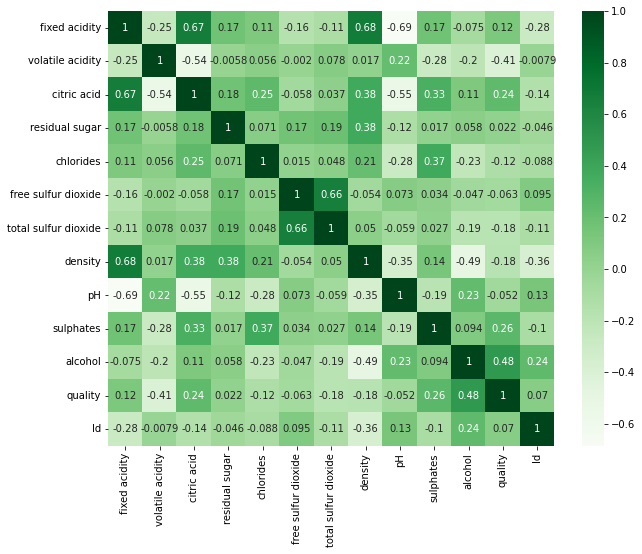

In [8]:
corr = WineQ_df.corr()

import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap = 'Greens', annot = True)

In [9]:
WineQ_df['quality'].nunique()

6

In [21]:
WineQ_df['fixed acidity'].value_counts()

7.2     43
7.1     41
7.0     40
7.8     40
7.5     37
        ..
4.6      1
13.7     1
13.4     1
13.5     1
12.2     1
Name: fixed acidity, Length: 91, dtype: int64

In [22]:
WineQ_df['density'].value_counts().sort_index()

0.99007    1
0.99020    1
0.99064    2
0.99084    1
0.99120    1
          ..
1.00260    2
1.00289    1
1.00315    2
1.00320    1
1.00369    1
Name: density, Length: 388, dtype: int64

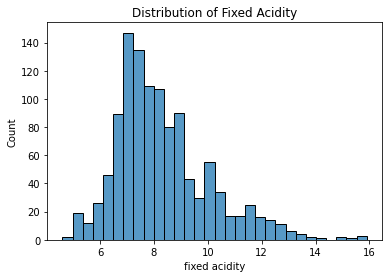

In [26]:
ax = sns.histplot(data=WineQ_df, x='fixed acidity',bins='auto');
ax.set_title('Distribution of Fixed Acidity');

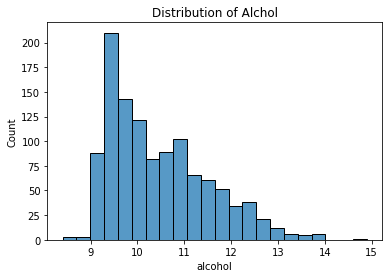

In [13]:
ax = sns.histplot(data=WineQ_df, x='alcohol',bins='auto');
ax.set_title('Distribution of Alchol');
##Here we have a linear distribution skewed to the left

count    1143.000000
mean        8.311111
std         1.747595
min         4.600000
25%         7.100000
50%         7.900000
75%         9.100000
max        15.900000
Name: fixed acidity, dtype: float64

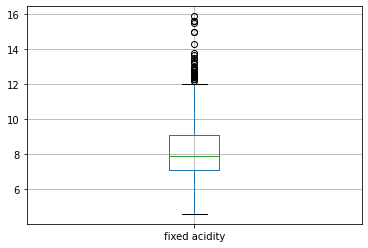

In [14]:
WineQ_df.boxplot(column = 'fixed acidity');
WineQ_df['fixed acidity'].describe()
## There are roughly 181.7 outliers about 16% 0f this columns data points

count    1143.000000
mean        0.996730
std         0.001925
min         0.990070
25%         0.995570
50%         0.996680
75%         0.997845
max         1.003690
Name: density, dtype: float64

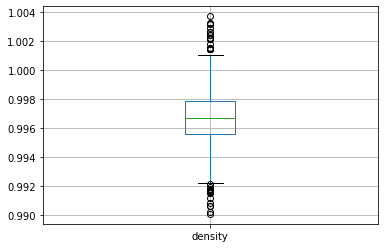

In [15]:
WineQ_df.boxplot(column = 'density');
WineQ_df['density'].describe()

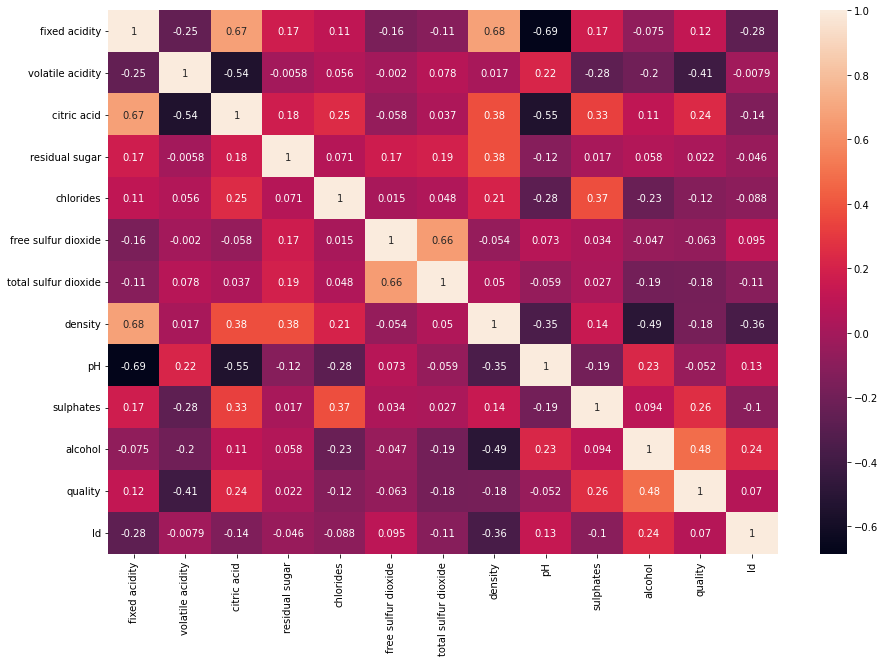

In [16]:
#The highest correlation is between fixed acidity density
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(WineQ_df.corr(), annot=True, ax=ax)

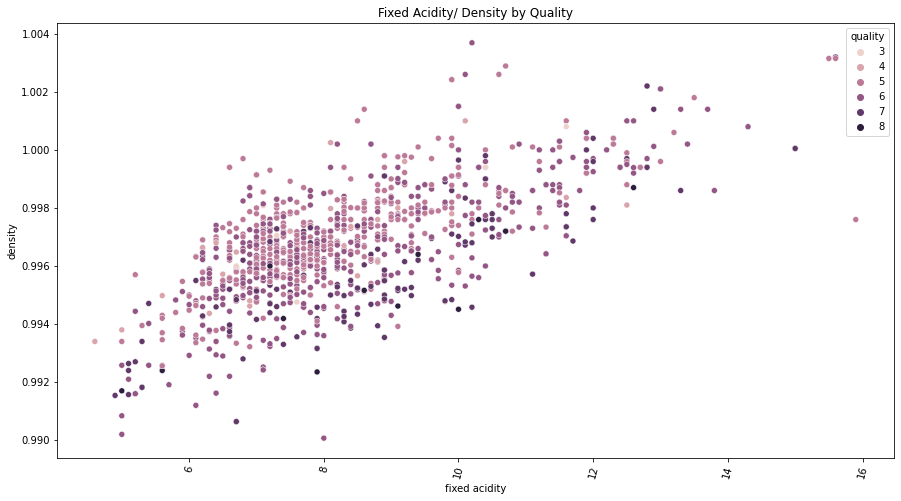

In [27]:
#According to the heatmap we can see the highest correlated patterns have a linear correlation for regression models and enough grouped data for classification cases
plt.figure(figsize=(15,8))
plt.xticks(rotation=75)
plt.title('Fixed Acidity/ Density by Quality')
ax = sns.scatterplot(x="fixed acidity", y="density", hue=WineQ_df["quality"], data=WineQ_df)